In [42]:
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from warnings import filterwarnings

# Comparativo entre México y Burundi: contexto histórico, educación, economía y sociedad

El objetivo de este trabajo es principalmente describir y contrastar el modo de vida, trabajando elementos económicos- estructurales, entre dos naciones que a bote pronto se podría pensar que no tienen elementos en común como intercambio comercial, lengua, tradiciones, religión, etc. El punto de partida es poner en contexo el sufrimiento de colonización europea existente en ambas naciones, suceso que si se comparte, y que cada sociedad ha tratado de manera distinta, respectivamente. 

Posteriormente, se abordan propiamente los elementos de corte económico estructural: 

a) Elementos microeconómicos como estructura de mercado, así como una descipción general del comportamiento de la oferta y la demanda.

b) Elementos macroeconómicos (extraídos directamente del banco mundial) que son de suma importancia para el desempeño económico de ambas sociedades, estos elementos on útiles para pensar sobre patrones de comercio internacional, repercisión de la educación en el desarrollo de los sectores, evaluación de políticas económicas, etc. 

Y por úlimo, se ofrecen sucintos comentarios y bibliografía que sirvió como base analítica para el desarrollo de este proyecto. Si bien se espera un comportamiento económico-estructural muy diferente, el objetivo es precisar cuantitativamente para la propia descripción y contraste.

### 1) Problema económico: 

**Niveles de vida no óptimos entre sociedades**: la sociedad mexicana y burundesa.

### 2) Breve contexto histórico:

La historia de ambas sociedades relata una era de colonización, en el caso de la sociedad mexicana se sufrió una colonización española (de 1521 a 1821) y dentro de la sociedad burundesa se vivió una primera colonización por parte de Alemania(de 1890 a 1916), donde se incorpora dicha nación a la África Oriental alemana (con Ruanda y Tanzania), y posteriormente a una segunda colonización por parte de Bélgica en 1916.

Siguiendo los consecuentes de la colonización, el sistema de castas gestado en la nueva españa, fue la base para el actual racismo existente en México, que paralelamente puede ser comprendido como un factor de desperdicio de capital humano, debido a la discriminación que algunos estereoripos generan.

Toda nación ha tenido problemas socio-políticos y económicos, pero particularmente, estas naciones han lidiado con conflictos que corresponden a su contexto. Por un lado, Burundi se ha visto envuelto en conflictos étnicos y genocidios, así como en una guerra civil. Y en contexto de la sociedad mexicana, se han vivido y sufrido hechos como la revolución mexicana (1910), gobiernos y políticas, represiones gubernamentales, narcotráfico, etc. 

En sumatoria, estas dos sociedades comparten una raíz colonial y sucesos que les son propios, mismos que explican, en gran medida la formación del imaginario colectivo, el comportamiento económico y el nivel de vida. 



### 3) Aspectos microeconómicos 

**a) Estructura de mercado dentro de las sociedades citadas.**

**b) Tipo de oferta:**

- La oferta del mercado en Burundi es dependiente del clima, y que su economía se basa en el sector agrícola. Mientras que en México la oferta se refiere a la producción agrícola, sector servicios y el sector industrial.

**c) Tipo de demanda:**

- Burundi demanda bienes básicos, mientras que en México se demandan bienes básicos, normales y bienes de lujo (siguiendo la tipificación de los bienes dentro de la teoría económica).

**d) Productividad del trabajo.**

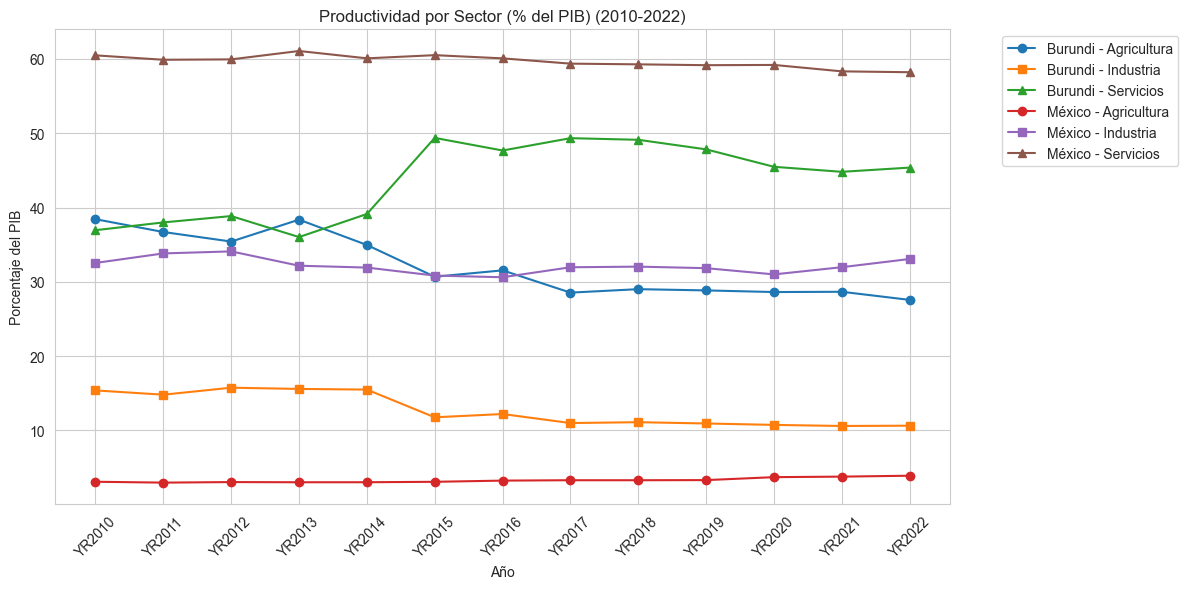

In [ ]:
# Configuración:
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)         

# Países y años:
countries = {'BDI': 'Burundi', 'MEX': 'México'}
years = range(2010, 2023)

# ----------------------------
# 1. Datos de la productividad (valor agregado por sector):
# ----------------------------
def get_productividad():
    indicators = ['NV.AGR.TOTL.ZS', 'NV.IND.TOTL.ZS', 'NV.SRV.TOTL.ZS']  # Valor agregado por sector (% PIB)
    df = wb.data.DataFrame(indicators, list(countries.keys()), time=years)
    df = df.stack().reset_index()
    df.columns = ['Código País', 'Sector', 'Año', 'Valor']
    df['País'] = df['Código País'].map(countries)
    df['Sector'] = df['Sector'].map({
        'NV.AGR.TOTL.ZS': 'Agricultura',
        'NV.IND.TOTL.ZS': 'Industria',
        'NV.SRV.TOTL.ZS': 'Servicios'
    })
    return df.pivot_table(index=['Año', 'País'], columns='Sector', values='Valor').reset_index()

# Obteneniendo  datos de productividad:
df_productividad = get_productividad()

# ----------------------------
# 3. Visualización de la Productividad:
# ----------------------------
plt.figure(figsize=(12, 6))
for pais in countries.values():
    subset = df_productividad[df_productividad['País'] == pais]
    plt.plot(subset['Año'], subset['Agricultura'], marker='o', label=f"{pais} - Agricultura")
    plt.plot(subset['Año'], subset['Industria'], marker='s', label=f"{pais} - Industria")
    plt.plot(subset['Año'], subset['Servicios'], marker='^', label=f"{pais} - Servicios")
plt.title('Productividad por Sector (% del PIB) (2010-2022)')
plt.xlabel('Año')
plt.ylabel('Porcentaje del PIB')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
# Configuración:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', None)         

# ----------------------------
# Descripción del análisis cualitativo:
# ----------------------------
def analisis_cualitativo():
    analisis = {
        'Estructura de mercado': {
            'Burundi': 'Competencia imperfecta: Hay mercados locales fragmentados con alta dependencia agrícola y existe también una presencia de intermediarios dominantes en cadenas de distribución.',
            'México': 'Competencia imperfecta: la dominancia se va a sectores como la manufactura y servicios. Y tenemos competencia oligopólica en sectores estratégicos (existentes en mercados tales como telecomunicaciones, energía, etc). De la misma manera hay monopolios estatales en petróleo (PEMEX).'
        },
        'Tipo de oferta': {
            'Burundi': 'Dependiente del clima: Agricultura de subsistencia (café, té, bananas). Es vulnerable a sequías e inundaciones. Además, la industria casi inexistente.',
            'México': 'Diversificada: Agricultura comercial (aguacate, cerveza), industria automotriz/aeroespacial, y servicios turísticos/financieros.'
        },
        'Tipo de demanda por parte de los agentes económicos': {
            'Burundi': 'Bienes básicos: con aproximadamente un 80% destinado al gasto en alimentos (de acuerdo con la FAO, 2023). Bajo consumo de manufacturas.',
            'México': 'Bienes básicos (representando aproximadamente un 50% del gasto), normales (electrodomésticos, educación) y de lujo (automóviles pertenecientes al sector premium, turismo internacional).'
        }
    }
    df = pd.DataFrame(analisis)
    return df

# Mostrarndo tabla :
print("\n\033[1mANÁLISIS CUALITATIVO\033[0m")
display(analisis_cualitativo())


ANÁLISIS CUALITATIVO


,Estructura de mercado,Tipo de oferta,Tipo de demanda por parte de los agentes económicos
Burundi,Competencia imperfecta: Hay mercados locales fragmentados con alta dependencia agrícola y existe también una presencia de intermediarios dominantes en cadenas de distribución.,"Dependiente del clima: Agricultura de subsistencia (café, té, bananas). Es vulnerable a sequías e inundaciones. Además, la industria casi inexistente.","Bienes básicos: con aproximadamente un 80% destinado al gasto en alimentos (de acuerdo con la FAO, 2023). Bajo consumo de manufacturas."
México,"Competencia imperfecta: la dominancia se va a sectores como la manufactura y servicios. Y tenemos competencia oligopólica en sectores estratégicos (existentes en mercados tales como telecomunicaciones, energía, etc). De la misma manera hay monopolios estatales en petróleo (PEMEX).","Diversificada: Agricultura comercial (aguacate, cerveza), industria automotriz/aeroespacial, y servicios turísticos/financieros.","Bienes básicos (representando aproximadamente un 50% del gasto), normales (electrodomésticos, educación) y de lujo (automóviles pertenecientes al sector premium, turismo internacional)."


#### - Comentarios:

### Aspectos macroeconómicos


a) PIB y crecimiento económico dentro de los países.

b) Estructura del empleo.

c) Niveles de inflación.

d) Política fiscal.

e) Tipo de cambio.

f) Nivel educativo de la población.

g) Nivel de pobreza.

In [ ]:
# Definimos los países (con códigos correspondientes) y años de interés:
countries = ['BDI', 'MEX']  # Burundi (BDI), México (MEX)
years = range(2010, 2023)   #Se define el intervalo

# ----------------------------
# 1. PIB y crecimiento económico:
# ----------------------------
pib = wb.data.DataFrame(
    ['NY.GDP.MKTP.CD',    # PIB (US$ actuales)
     'NY.GDP.MKTP.KD.ZG', # Crecimiento del PIB (% anual)
     'NY.GDP.PCAP.CD'],   # PIB per cápita (US$ actuales)
    countries, time=years
)

# ----------------------------
# 2. Estructura del empleo (% empleo por sector):
# ----------------------------
empleo = wb.data.DataFrame(
    ['SL.AGR.EMPL.ZS',  # Empleo en agricultura (% del empleo total)
     'SL.IND.EMPL.ZS',  # Empleo en industria (% del empleo total)
     'SL.SRV.EMPL.ZS'], # Empleo en servicios (% del empleo total)
    countries, time=years
)

# ----------------------------
# 3. Inflación (% anual):
# ----------------------------
inflacion = wb.data.DataFrame(
    'FP.CPI.TOTL.ZG',  # Inflación (índice de precios al consumidor)
    countries, time=years
)

# ----------------------------
# 4. Para la política fiscal:
# ----------------------------
fiscal = wb.data.DataFrame(
    ['GC.BAL.CASH.GD.ZS',  # Balance fiscal (% del PIB)
     'GC.REV.XGRT.GD.ZS',  # Ingresos fiscales (% del PIB)
     'GC.XPN.TOTL.GD.ZS'], # Gasto público (% del PIB)
    countries, time=years
)

# ----------------------------
# 5. Tipo de Cambio (moneda local por USD):
# ----------------------------
tipo_cambio = wb.data.DataFrame(
    'PA.NUS.FCRF',  # Tipo de cambio oficial (USD a moneda local)
    countries, time=years
)

# ----------------------------
# 6. Para el nivel educativo (basándonos por matrícula escolar):
# ----------------------------
educacion = wb.data.DataFrame(
    ['SE.PRM.NENR',  # Tasa de matrícula primaria (% bruto)
     'SE.SEC.NENR',  # Tasa de matrícula secundaria (% bruto)
     'SE.TER.ENRR'], # Tasa de matrícula terciaria (% bruto)
    countries, time=years
)

# ----------------------------
# 7. Para el nivel de pobreza:
# ----------------------------
pobreza = wb.data.DataFrame(
    ['SI.POV.DDAY',  # Pobreza extrema (% población con < $1.90/día)
     'SI.POV.NAHC'], # Pobreza nacional (% población bajo línea nacional)
    countries, time=years
)



PIB


Indicador,Año,País,Crecimiento PIB (%),PIB (US$),PIB per cápita (US$)
0,2010,Burundi,5.124160,2.032135e+09,216.727705
1,2010,México,4.971335,1.105424e+12,9728.800784
2,2011,Burundi,4.032600,2.235821e+09,230.070577
3,2011,México,3.444045,1.229014e+12,10664.494403
4,2012,Burundi,4.446706,2.333341e+09,231.688496



EMPLEO


Indicador,Año,País,Empleo Agricultura (%),Empleo Industria (%),Empleo Servicios (%)
0,2010,Burundi,88.389690,2.995090,8.615220
1,2010,México,14.635556,23.037763,62.326680
2,2011,Burundi,87.877355,3.106441,9.016204
3,2011,México,14.222824,23.081354,62.695822
4,2012,Burundi,87.314758,3.231805,9.453437


Error en Inflación: Length mismatch: Expected axis has 3 elements, new values have 4 elements

FISCAL


Indicador,Año,País,Gasto Público (% PIB),Ingresos Fiscales (% PIB)
0,2010,Burundi,21.420229,14.776412
1,2010,México,20.481550,17.266092
2,2011,Burundi,19.999298,16.720494
3,2011,México,20.874074,18.169056
4,2012,Burundi,17.938101,15.973223



EDUCACIÓN


Indicador,Año,País,Matrícula Primaria (%),Matrícula Secundaria (%),Matrícula Terciaria (%)
0,2010,Burundi,95.37413,15.17589,3.121240
1,2010,México,98.07710,70.08479,27.167021
2,2011,Burundi,NaN,16.88675,NaN
3,2011,México,97.98488,70.65515,28.036160
4,2012,Burundi,NaN,18.42151,3.842119



POBREZA


Indicador,Año,País,Pobreza Extrema (<$1.9/día),Pobreza Nacional (%)
0,2010,México,4.7,NaN
1,2012,México,4.2,NaN
2,2013,Burundi,65.1,64.9
3,2014,México,4.0,NaN
4,2016,México,2.3,43.6


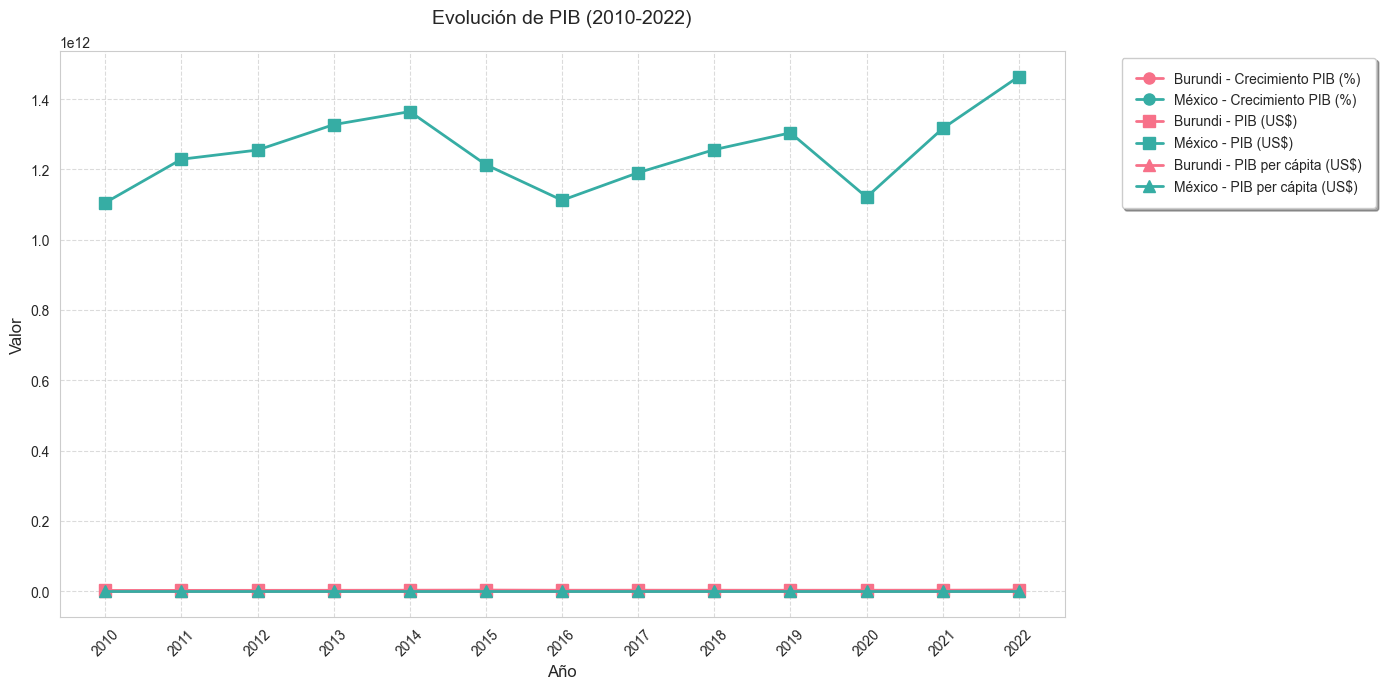

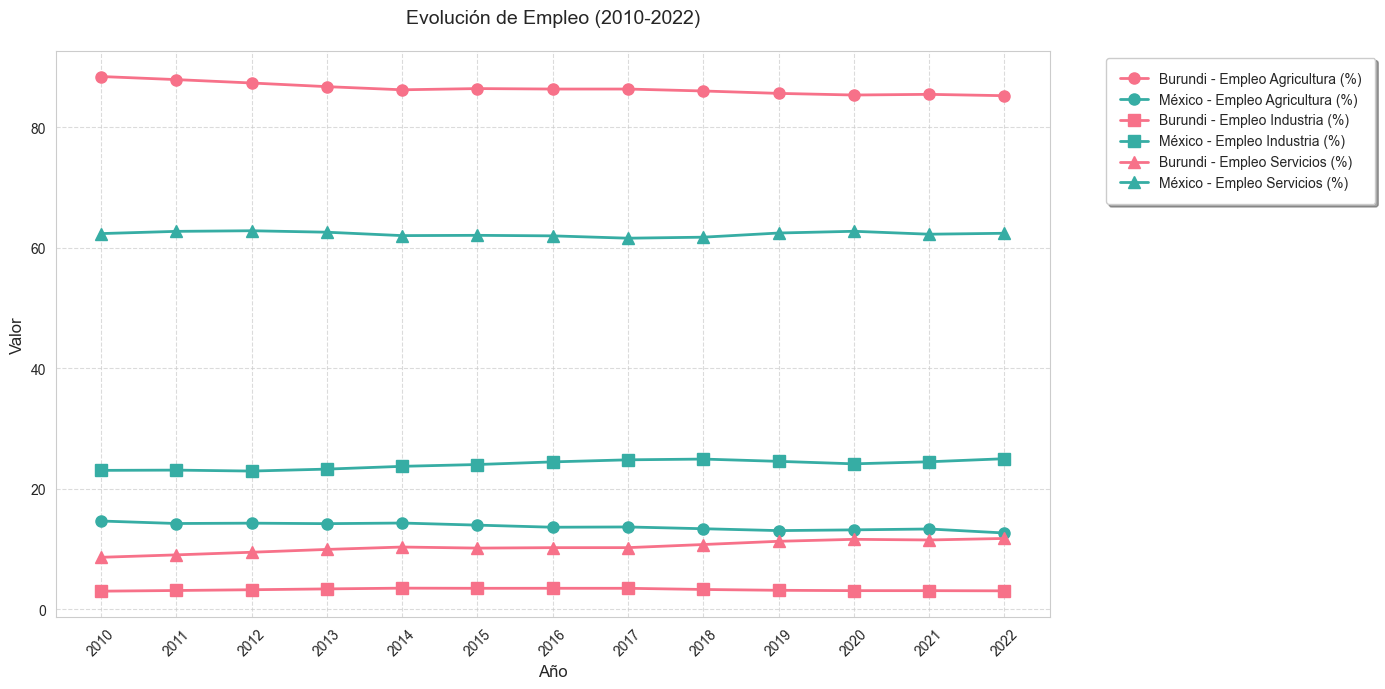

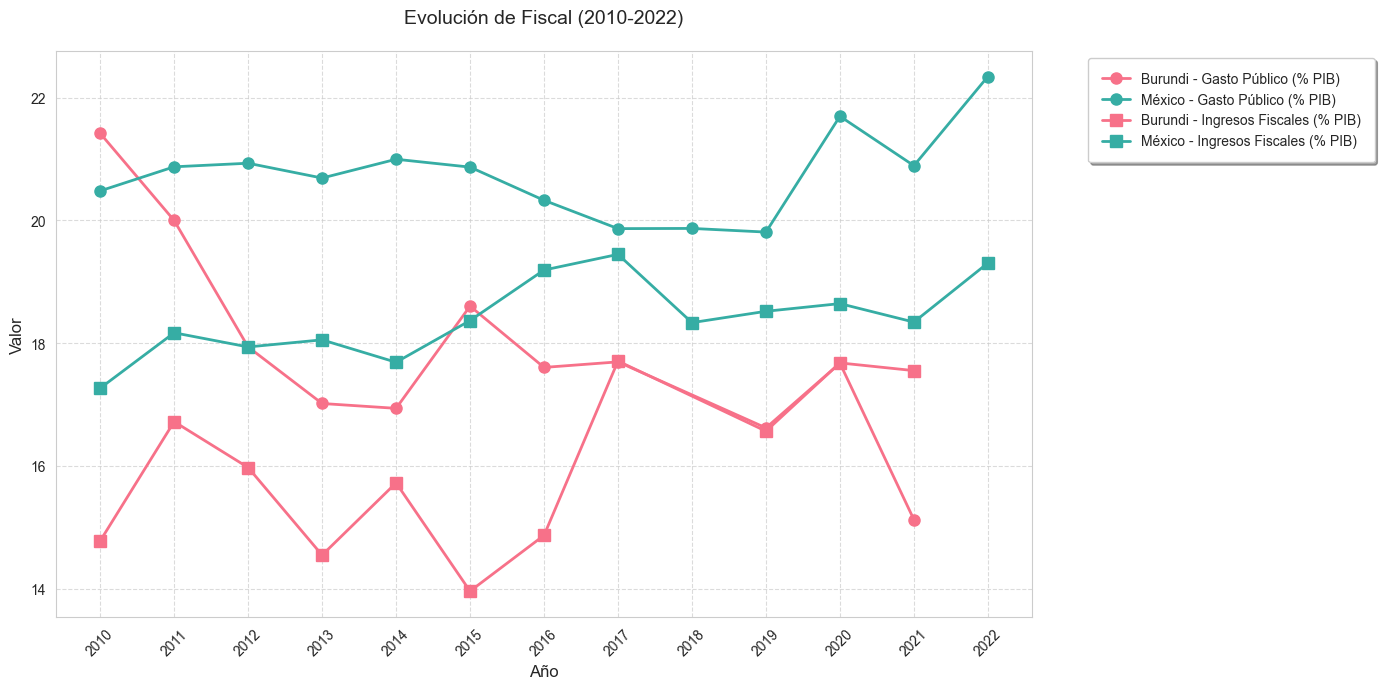

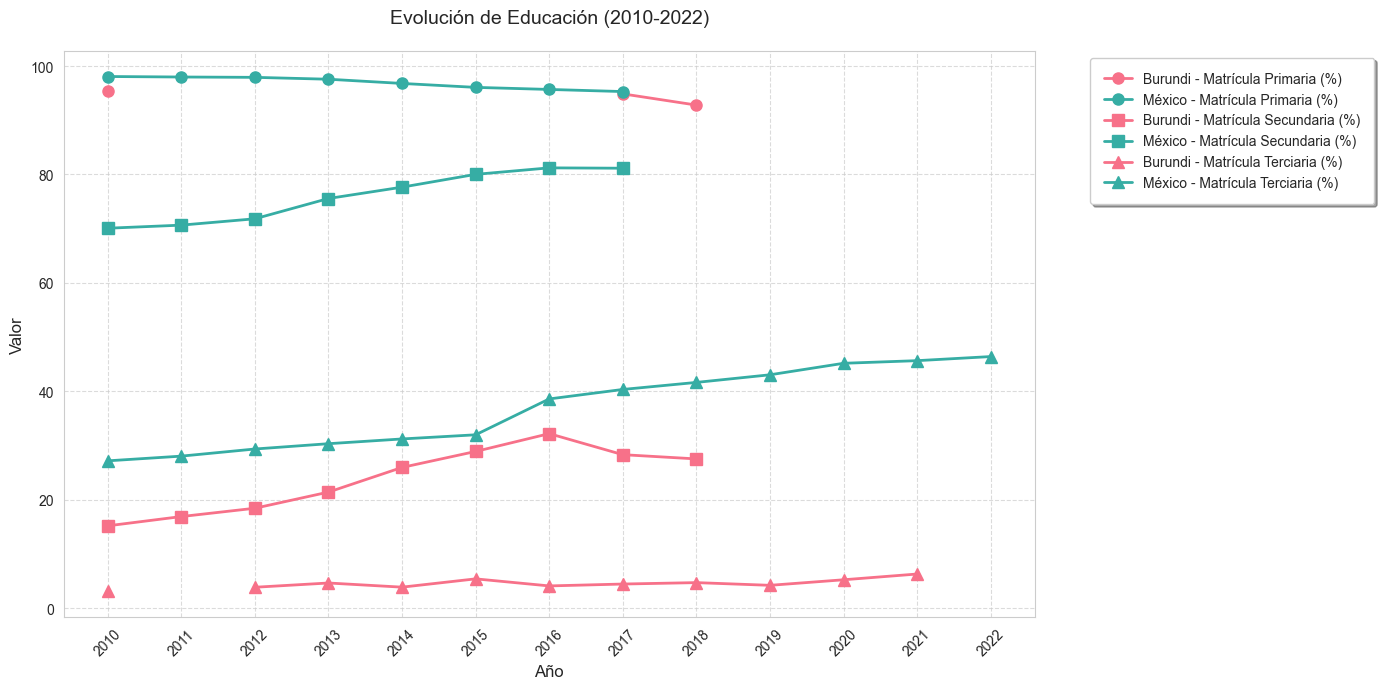

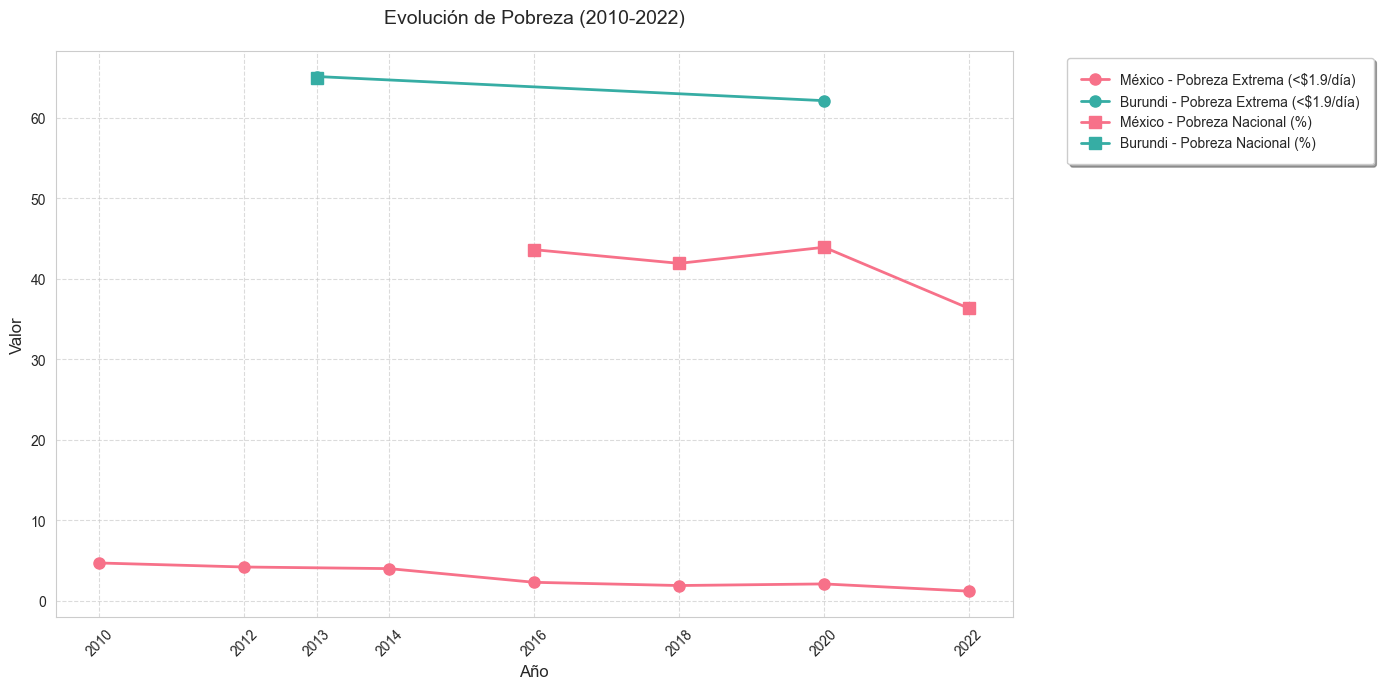

In [46]:
# Configuración 
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

# Países y años de análisis
countries = {'BDI': 'Burundi', 'MEX': 'México'}
years = range(2010, 2023)

# ----------------------------
# 1. Obtención de datos
# ----------------------------
def get_wb_data(indicators, countries, years, indicator_names):
    # Obtener datos y apilar el DataFrame
    df = wb.data.DataFrame(indicators, list(countries.keys()), time=years)
    df = df.stack().reset_index()
    
    
    df.columns = ['Código País', 'Indicador', 'Año', 'Valor']
    
    
    df['Año'] = df['Año'].apply(lambda x: int(str(x)[2:6]) if 'YR' in str(x) else int(x))
    df = df.sort_values('Año')
    
    
    df['País'] = df['Código País'].map(countries)
    df['Indicador'] = df['Indicador'].map(dict(zip(indicators, indicator_names)))
    
    # Se usa una pivot table para mejorar la calidad de la visualización de datos
    result = df.pivot_table(index=['Año', 'País'], columns='Indicador', values='Valor').reset_index()
    return result

# ----------------------------
# 2. Extracción de datos:
# ----------------------------
indicadores = {
    'PIB': ['NY.GDP.MKTP.CD', 'NY.GDP.MKTP.KD.ZG', 'NY.GDP.PCAP.CD'],
    'Empleo': ['SL.AGR.EMPL.ZS', 'SL.IND.EMPL.ZS', 'SL.SRV.EMPL.ZS'],
    'Inflación': ['FP.CPI.TOTL.ZG'],
    'Fiscal': ['GC.BAL.CASH.GD.ZS', 'GC.REV.XGRT.GD.ZS', 'GC.XPN.TOTL.GD.ZS'],
    'Educación': ['SE.PRM.NENR', 'SE.SEC.NENR', 'SE.TER.ENRR'],
    'Pobreza': ['SI.POV.DDAY', 'SI.POV.NAHC']
}

nombres_indicadores = {
    'PIB': ['PIB (US$)', 'Crecimiento PIB (%)', 'PIB per cápita (US$)'],
    'Empleo': ['Empleo Agricultura (%)', 'Empleo Industria (%)', 'Empleo Servicios (%)'],
    'Inflación': ['Inflación (%)'],
    'Fiscal': ['Balance Fiscal (% PIB)', 'Ingresos Fiscales (% PIB)', 'Gasto Público (% PIB)'],
    'Educación': ['Matrícula Primaria (%)', 'Matrícula Secundaria (%)', 'Matrícula Terciaria (%)'],
    'Pobreza': ['Pobreza Extrema (<$1.9/día)', 'Pobreza Nacional (%)']
}

dataframes = {}
for key in indicadores:
    try:
        dataframes[key] = get_wb_data(indicadores[key], countries, years, nombres_indicadores[key])
        print(f"\n\033[1m{key.upper()}\033[0m")
        display(dataframes[key].head())
    except Exception as e:
        print(f"Error en {key}: {str(e)}")

# ----------------------------
# 3. Visualización y gráficos
# ----------------------------
for key, df in dataframes.items():
    if not df.empty:
        plt.figure(figsize=(14, 7))
        
        
        markers = ['o', 's', '^', 'D', 'v', 'p']
        colors = sns.color_palette("husl", len(df['País'].unique()))
        
        for i, column in enumerate(df.columns[2:]):  # Ignorar 'Año' y 'País'
            for j, country in enumerate(df['País'].unique()):
                subset = df[df['País'] == country]
                plt.plot(subset['Año'], subset[column], 
                         marker=markers[i], 
                         color=colors[j], 
                         linestyle='-',
                         linewidth=2,
                         markersize=8,
                         label=f"{country} - {column}")
        
        
        plt.xticks(df['Año'].unique(), rotation=45)
        plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
        
        
        plt.title(f"Evolución de {key} (2010-2022)", pad=20, fontsize=14)
        plt.xlabel('Año', fontsize=12)
        plt.ylabel('Valor', fontsize=12)
        
        
        plt.legend(bbox_to_anchor=(1.05, 1), 
                  loc='upper left',
                  fontsize=10,
                  frameon=True,
                  shadow=True,
                  borderpad=1)
        
        
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        
        
        
        plt.show()

#### - Comentarios:

Como comentario final se puede decir que, en efecto, el comportamiento económico-estructural completamente diferente, esto se debe un contexto histórico-político, contexto geográfico, fenómenos sociales, etc., (analizar estos elementos no son objetivo de este proyecto, pero puede el análisis descriptivo actual  puede ser usado para ser usado como base de otros análisis en el futuro).

Esta dispariedad se observa en el comportamiento de PIB, en el contexto educativo, el comportamiento de los agentes económicos dentro de la estructura de mercado, la evolución fiscal también tiene un comportamiento muy diferente y esto repercute directamente en otros elementos. 


### Bibliografía

- Guichaoua, A. (2022). Burundi: A Country in Search of Its History. Recherche Afrique des Grands Lacs. Recuperado de https://recherche-afriquedesgrandslacs.pantheonsorbonne.fr/sites/default/files/2022-07/20220705%20%E2%80%94%20History_of_Burundi%20English.pdf

- Lemarchand, R. (1996). Burundi: Ethnic Conflict and Genocide. Woodrow Wilson International Center for Scholars.

- World Bank. World Bank. https://www.worldbank.org